# 1 逻辑回归

在训练的初始阶段，我们将要构建一个逻辑回归模型来预测，某个学生是否被大学录取。
设想你是大学相关部分的管理者，想通过申请学生两次测试的评分，来决定他们是否被录取。
现在你拥有之前申请学生的可以用于训练逻辑回归的训练样本集。对于每一个训练样本，你有他们两次测试的评分和最后是被录取的结果。

## 1.1 数据可视化

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = 'E:\机器学习(吴恩达)\ML数据\ml_ex2\ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam1', 'Exam2', 'Admitted'])
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


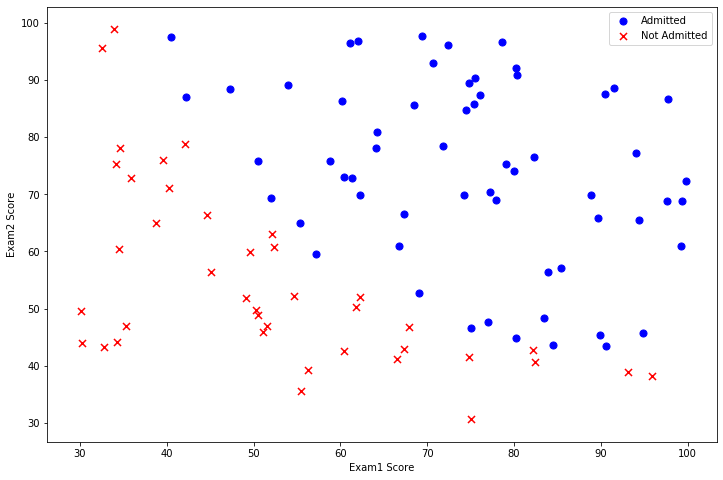

In [13]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam1 Score')
ax.set_ylabel('Exam2 Score')
plt.show()

## 1.2 实现

## 1.2.1 sigmoid 函数
逻辑回归函数为
$$
h_\theta=g(\theta^Tx)
$$

g代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为：
$$
g(z)=\frac{1}{1+{{e}^{-z}}}
$$
合起来，我们得到逻辑回归模型的假设函数： 
$$
h_\theta( x ) =\frac{1}{1+{e^{-\theta^T x}}}
$$

In [14]:
#实现sigmoid函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

###1.2.2 代价函数和梯度

代价函数：
$$
J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}
$$
梯度：
$$
\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}
$$
虽然这个梯度和前面线性回归的梯度很像，但是要记住$h_\theta(x)$是不一样的
实现完成后，用初始$\theta$代入计算，结果应该是0.693左右
